<a href="https://colab.research.google.com/github/z-arabi/SRU-deeplearning-workshop/blob/master/09_Callbacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import datetime
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Flatten, Dense

In [2]:
# https://keras.io/api/datasets/fashion_mnist/#load_data-function
mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape, x_train.dtype)

4422102/4422102 [==============================] - 1s 0us/step
(60000, 28, 28) uint8


9


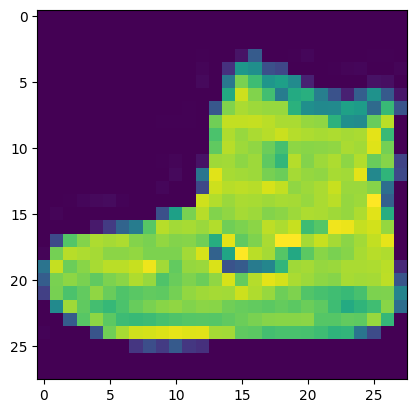

In [3]:
print(y_train[0])
plt.imshow(x_train[0])

In [4]:
# normalization
x_train = x_train / 255.0
x_test = x_test / 255.0

In [5]:
# not one hot > sparse
print(y_train.shape)

(60000,)


## Custom Callback

In [6]:
class MyCustomCallback(tf.keras.callbacks.Callback):

  def on_train_begin(self,logs=None):
    print("Training is started!")

  def on_epoch_begin(self, epoch, logs=None):
    print("-"*50)
    print(f"Epochs {epoch} is strated!")

  def on_train_batch_begin(self,batch, logs=None):
    if batch%100 == 0:
      print(f"\n Training: batch {batch} begins")

  def on_test_begin(self,logs=None):
    print("\n", "*"*50)
    t = datetime.datetime.now().time()
    print(f'Evaluation begins at {t}')

  def on_test_end(self,logs=None):
    t = datetime.datetime.now().time()
    print(f'Evaluation finishes at {t}')

  def on_train_end(self,logs=None):
    print("Training is ended!")


In [7]:
my_callback = MyCustomCallback()

In [8]:
model = tf.keras.models.Sequential([
    Flatten(input_shape=(28,28)),
    Dense(512,activation=tf.nn.relu),
    Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

'''
verbose is for default baseLogger:
verbose=0 will show you nothing (silent) from BaseLogger
verbose=1 will show you an animated progress bar
verbose=2 will just mention the number of epoch
'''
model.fit(x_train, y_train,
          epochs=2,
          validation_split=0.2,
          callbacks=[my_callback])

Training is started!
--------------------------------------------------
Epochs 0 is strated!
Epoch 1/2

 Training: batch 0 begins
  96/1500 [>.............................] - ETA: 6s - loss: 0.8471 - accuracy: 0.7035
 Training: batch 100 begins
 192/1500 [==>...........................] - ETA: 6s - loss: 0.7439 - accuracy: 0.7357
 Training: batch 200 begins
 290/1500 [====>.........................] - ETA: 5s - loss: 0.6787 - accuracy: 0.7609
 Training: batch 300 begins
 399/1500 [======>.......................] - ETA: 5s - loss: 0.6496 - accuracy: 0.7714
 Training: batch 400 begins
 496/1500 [========>.....................] - ETA: 4s - loss: 0.6192 - accuracy: 0.7820
 Training: batch 500 begins
 590/1500 [==========>...................] - ETA: 4s - loss: 0.5962 - accuracy: 0.7903
 Training: batch 600 begins
 694/1500 [============>.................] - ETA: 3s - loss: 0.5759 - accuracy: 0.7967
 Training: batch 700 begins
 793/1500 [==============>...............] - ETA: 3s - loss: 0.56

# CSVLogger

In [9]:
from tensorflow.keras.callbacks import CSVLogger

In [10]:
csv_logger = CSVLogger('training.log')
# you can use !tail -f training.log

In [11]:
model = tf.keras.models.Sequential([
    Flatten(input_shape=(28,28)),
    Dense(512,activation=tf.nn.relu),
    Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(x_train, y_train,
          epochs=5,
          validation_split=0.2,
          callbacks=[csv_logger])

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4923 - accuracy: 0.8244 - val_loss: 0.4008 - val_accuracy: 0.8543
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3708 - accuracy: 0.8653 - val_loss: 0.3434 - val_accuracy: 0.8776
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3318 - accuracy: 0.8781 - val_loss: 0.3532 - val_accuracy: 0.8687
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3051 - accuracy: 0.8863 - val_loss: 0.3538 - val_accuracy: 0.8743
Epoch 5/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2868 - accuracy: 0.8942 - val_loss: 0.3376 - val_accuracy: 0.8771


## Early stopping

In [12]:
# with overfitting
model = tf.keras.models.Sequential([
    Flatten(input_shape=(28,28)),
    Dense(512,activation=tf.nn.relu),
    Dense(512,activation=tf.nn.relu),
    Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(x_train, y_train,
          epochs=10,
          validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 12s 6ms/step - loss: 0.4832 - accuracy: 0.8254 - val_loss: 0.3943 - val_accuracy: 0.8560
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3647 - accuracy: 0.8656 - val_loss: 0.3773 - val_accuracy: 0.8612
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3290 - accuracy: 0.8771 - val_loss: 0.3453 - val_accuracy: 0.8753
Epoch 4/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3004 - accuracy: 0.8875 - val_loss: 0.3252 - val_accuracy: 0.8835
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2869 - accuracy: 0.8916 - val_loss: 0.3202 - val_accuracy: 0.8839
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2688 - accuracy: 0.8983 - val_loss: 0.3435 - val_accuracy: 0.8785
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2563 - accuracy: 0.9034 - val_loss: 0.3275 - val_accuracy

In [13]:
def plot_history(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  import matplotlib.pyplot as plt
  %matplotlib inline

  epochs = range(len(acc))

  plt.figure()
  plt.plot(epochs, acc, "b-o", label="Training acc")
  plt.plot(epochs, val_acc, "g-o", label="Validation acc")
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()
  plt.plot(epochs, loss, "b-o", label="Training loss")
  plt.plot(epochs, val_loss, "g-o", label="Validation loss")
  plt.title('Training and validation accuracy')
  plt.legend()

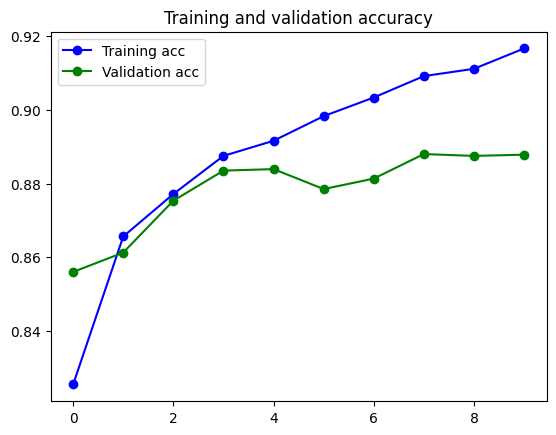

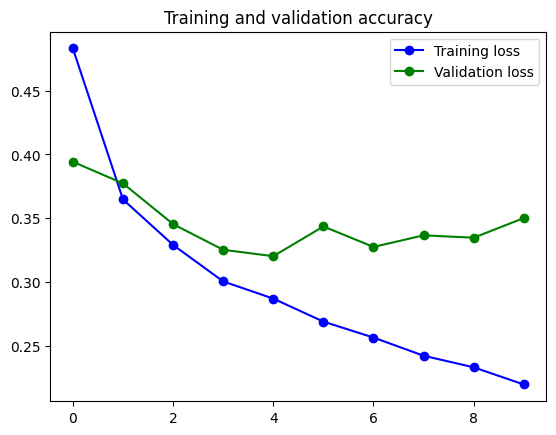

In [14]:
plot_history(history)

In [15]:
from tensorflow.keras.callbacks import EarlyStopping

In [16]:
early_stopping = EarlyStopping(patience=2, monitor="val_loss")

In [17]:
model = tf.keras.models.Sequential([
    Flatten(input_shape=(28,28)),
    Dense(512,activation=tf.nn.relu),
    Dense(512,activation=tf.nn.relu),
    Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history_earlyStopping = model.fit(x_train, y_train,
          epochs=10,
          validation_split=0.2,
          callbacks=[early_stopping])

Epoch 1/10
1500/1500 [==============================] - 9s 5ms/step - loss: 0.4852 - accuracy: 0.8221 - val_loss: 0.4025 - val_accuracy: 0.8561
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3651 - accuracy: 0.8651 - val_loss: 0.4117 - val_accuracy: 0.8507
Epoch 3/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.3290 - accuracy: 0.8785 - val_loss: 0.3736 - val_accuracy: 0.8618
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3039 - accuracy: 0.8865 - val_loss: 0.3547 - val_accuracy: 0.8763
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2850 - accuracy: 0.8934 - val_loss: 0.3493 - val_accuracy: 0.8735
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2712 - accuracy: 0.8981 - val_loss: 0.3725 - val_accuracy: 0.8704
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2564 - accuracy: 0.9019 - val_loss: 0.3299 - val_accuracy:

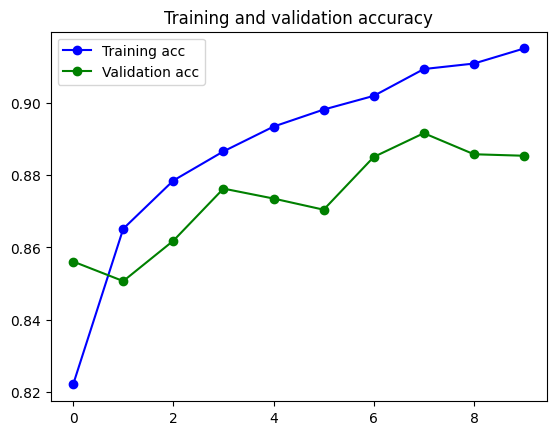

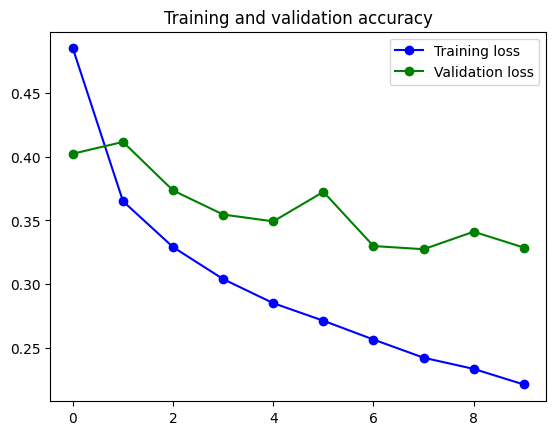

In [18]:
plot_history(history_earlyStopping)

In [19]:
history_earlyStopping.params

{'verbose': 1, 'epochs': 10, 'steps': 1500}

In [20]:
history_earlyStopping.epoch

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

## Lambda Callback


In [21]:
from tensorflow.keras.callbacks import LambdaCallback

In [22]:
model = tf.keras.models.Sequential([
    Flatten(input_shape=(28,28)),
    Dense(512,activation=tf.nn.relu),
    Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history_earlyStopping = model.fit(x_train, y_train,
          epochs=10,
          validation_split=0.2,
          callbacks=[LambdaCallback(on_epoch_begin=lambda epochs, logs: print(epochs))])

0
Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4919 - accuracy: 0.8239 - val_loss: 0.3826 - val_accuracy: 0.8653
1
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3686 - accuracy: 0.8650 - val_loss: 0.3559 - val_accuracy: 0.8728
2
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3297 - accuracy: 0.8780 - val_loss: 0.3490 - val_accuracy: 0.8757
3
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3022 - accuracy: 0.8885 - val_loss: 0.3366 - val_accuracy: 0.8797
4
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2857 - accuracy: 0.8928 - val_loss: 0.3305 - val_accuracy: 0.8788
5
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2718 - accuracy: 0.8972 - val_loss: 0.3427 - val_accuracy: 0.8756
6
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2566 - accuracy: 0.9034 - val_loss: 0.3379 -

## Learning Rate Scheduler

In [23]:
from tensorflow.keras.callbacks import LearningRateScheduler

In [24]:
def scheduler(epoch):
  if epoch < 2:
    return 0.001
  elif epoch < 6 :
    return 0.0001
  else:
    return 0.00001

learning_rate_schedule = LearningRateScheduler(scheduler, verbose=1)

In [25]:
model = tf.keras.models.Sequential([
    Flatten(input_shape=(28,28)),
    Dense(512,activation=tf.nn.relu),
    Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(x_train, y_train,
          epochs=10,
          validation_split=0.2,
          callbacks=[learning_rate_schedule])


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.4909 - accuracy: 0.8250 - val_loss: 0.4034 - val_accuracy: 0.8528 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3692 - accuracy: 0.8645 - val_loss: 0.3741 - val_accuracy: 0.8648 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.0001.
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2917 - accuracy: 0.8918 - val_loss: 0.3229 - val_accuracy: 0.8798 - lr: 1.0000e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.0001.
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2789 - accuracy: 0.8975 - val_loss: 0.3175 - val_accuracy: 0.8835 - lr: 1.0000e-04

Epoch 5: LearningRateScheduler setting learning rate to 0.0001.
Epoch 5/10
1500/1500 [===================

## Model Checkpoint

In [32]:
from tensorflow.keras.callbacks import ModelCheckpoint
import os

In [27]:
def create_model():
  model = tf.keras.models.Sequential([
    Flatten(input_shape=(28,28)),
    Dense(512,activation=tf.nn.relu),
    Dense(10, activation=tf.nn.softmax)
  ])

  model.compile(optimizer="adam",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])

  return model

In [33]:
model = create_model()

In [37]:
filepath = "training_1/cp.ckpt" #tensorflow format
cp_dir = os.path.dirname(filepath) #create directory
cp_callback = ModelCheckpoint(filepath = filepath,
                              save_weights_only = True,
                              verbose=1)

# for each epoch it returns 4 files, uses in distributed training
# save the last epoch information

In [38]:
model.fit(x_train, y_train,
          epochs=10,
          validation_split=0.2,
          callbacks=[cp_callback])

Epoch 1/10
1498/1500 [============================>.] - ETA: 0s - loss: 0.2565 - accuracy: 0.9044
Epoch 1: saving model to training_1/cp.ckpt
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2564 - accuracy: 0.9044 - val_loss: 0.3242 - val_accuracy: 0.8870
Epoch 2/10
1482/1500 [============================>.] - ETA: 0s - loss: 0.2444 - accuracy: 0.9075
Epoch 2: saving model to training_1/cp.ckpt
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2442 - accuracy: 0.9075 - val_loss: 0.3093 - val_accuracy: 0.8917
Epoch 3/10
1493/1500 [============================>.] - ETA: 0s - loss: 0.2317 - accuracy: 0.9127
Epoch 3: saving model to training_1/cp.ckpt
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2316 - accuracy: 0.9127 - val_loss: 0.3493 - val_accuracy: 0.8767
Epoch 4/10
1497/1500 [============================>.] - ETA: 0s - loss: 0.2231 - accuracy: 0.9169
Epoch 4: saving model to training_1/cp.ckpt
1500/1500 [======================

In [39]:
model = create_model()
loss, acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.3333 - accuracy: 0.1330


In [40]:
model.load_weights(filepath)
loss, acc = model.evaluate(x_test, y_test)
# we see that the model saves and loads correctly

313/313 [==============================] - 1s 4ms/step - loss: 0.3605 - accuracy: 0.8831


In [44]:
cp_path = "training_2/cp-{epoch:04d}.ckpt"
cp_dir = os.path.dirname(cp_path)

In [45]:
cp_callback = ModelCheckpoint(filepath = cp_path,
                              save_weights_only = True,
                              save_freq='epoch',
                              period=5,
                              verbose=1)

# save_freq = int > every int mini-batch saves
# period > every n epoch saves

In [46]:
model.fit(x_train, y_train,
          epochs=10,
          validation_split=0.2,
          callbacks=[cp_callback])

Epoch 1/10
1500/1500 [==============================] - 6s 3ms/step - loss: 0.1686 - accuracy: 0.9364 - val_loss: 0.3315 - val_accuracy: 0.8975
Epoch 2/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1663 - accuracy: 0.9385 - val_loss: 0.3421 - val_accuracy: 0.8899
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1601 - accuracy: 0.9401 - val_loss: 0.3737 - val_accuracy: 0.8880
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1547 - accuracy: 0.9423 - val_loss: 0.3374 - val_accuracy: 0.8905
Epoch 5/10
1486/1500 [============================>.] - ETA: 0s - loss: 0.1483 - accuracy: 0.9453
Epoch 5: saving model to training_2/cp-0005.ckpt
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1484 - accuracy: 0.9452 - val_loss: 0.3959 - val_accuracy: 0.8834
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1478 - accuracy: 0.9434 - val_loss: 0.3684 - val_accuracy: 0.8917


In [47]:
# it reads the last cp from the checkpoint file in the directory
# if we change it, we will face error
latest = tf.train.latest_checkpoint(cp_dir)
latest

'training_2/cp-0010.ckpt'

In [49]:
os.mkdir("training_3")
ckpt_callback = ModelCheckpoint(filepath="training_3/weights.{epoch:02d}-{val_loss:.2f}.hdf5",
                                monitor = "val_loss")

In [58]:
model = create_model()
model.fit(x_train, y_train,
          epochs=10, 
          validation_split=0.2,
          callbacks=[learning_rate_schedule, ckpt_callback])


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/10
1500/1500 [==============================] - 6s 3ms/step - loss: 0.4931 - accuracy: 0.8253 - val_loss: 0.4378 - val_accuracy: 0.8447 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3693 - accuracy: 0.8661 - val_loss: 0.3547 - val_accuracy: 0.8746 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.0001.
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2899 - accuracy: 0.8936 - val_loss: 0.3190 - val_accuracy: 0.8821 - lr: 1.0000e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.0001.
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2772 - accuracy: 0.8989 - val_loss: 0.3135 - val_accuracy: 0.8861 - lr: 1.0000e-04

Epoch 5: LearningRateScheduler setting learning rate to 0.0001.
Epoch 5/10
1500/1500 [===================

In [74]:
checkpoint_path = "/content/training_3/weights.10-0.30.hdf5"

In [75]:
del model

In [85]:
from tensorflow.keras.models import load_model

model = load_model(checkpoint_path)

In [86]:
# continue the training
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# now we resume the training 
# so the epoch 1 here means the epoch 11 but the LR scheduler doesn't understand that
model.fit(x_train, y_train,
          epochs=3, 
          validation_split=0.2,
          callbacks=[learning_rate_schedule])


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/3
1500/1500 [==============================] - 6s 3ms/step - loss: 0.3122 - accuracy: 0.8851 - val_loss: 0.3485 - val_accuracy: 0.8786 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/3
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2931 - accuracy: 0.8899 - val_loss: 0.3370 - val_accuracy: 0.8813 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.0001.
Epoch 3/3
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2325 - accuracy: 0.9145 - val_loss: 0.2950 - val_accuracy: 0.8934 - lr: 1.0000e-04


In [83]:
last_epoch = int(checkpoint_path.split('-')[-2].split('.')[-1])
last_epoch

10

In [96]:
# so to fix this
del model
model = load_model(checkpoint_path)

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Note that in conjunction with initial_epoch, epochs is to be understood as "final epoch".
history = model.fit(x_train, y_train,
          epochs=13, 
          validation_split=0.2,
          callbacks=[learning_rate_schedule],
          initial_epoch=10)


Epoch 11: LearningRateScheduler setting learning rate to 1e-05.
Epoch 11/13
1500/1500 [==============================] - 6s 3ms/step - loss: 0.2466 - accuracy: 0.9100 - val_loss: 0.3023 - val_accuracy: 0.8902 - lr: 1.0000e-05

Epoch 12: LearningRateScheduler setting learning rate to 1e-05.
Epoch 12/13
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2459 - accuracy: 0.9106 - val_loss: 0.3023 - val_accuracy: 0.8900 - lr: 1.0000e-05

Epoch 13: LearningRateScheduler setting learning rate to 1e-05.
Epoch 13/13
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2452 - accuracy: 0.9108 - val_loss: 0.3021 - val_accuracy: 0.8902 - lr: 1.0000e-05
